# Data Cleaning D206 Performance Assessment

#### Id No.: 010756950 
#### Mentor: Eric Straw
#### Date: 12/03/2022

## Part I: Research Question

### A. Question or Decision

For this assessment, I will be using churn dataset to clean, analyze and indentify the trends of the data. My research question 

will be: Which variables are most important to predict which customers are at high risk of churn?

### B. Required Variables

#### The data set consists of 10,000 customers and 52 columns/variables:

• Unnamed: integer

• CaseOrder: integer index to preserve original order of raw data

• Customer_id: character string unique to customer

• Interaction, UID: character string unique to customer transactions, technical support, and sign-ups

#### The following variables represent customer demographic data:

   - City: character string indicating customer city of residence as listed on the billing statement

   - State: character string indicating customer state of residence as listed on the billing statement

   - County: character string indicating customer county of residence as listed on the billing statement

   - Zip: integer indicating customer zip code of residence as listed on the billing statement

   - Lat, Lng: float indicating GPS coordinates of customer residence 

   - Population: integer indicating population within a mile radius of customer, based on census data

   - Area: character indicating area type (rural, urban, suburban), based on census data

   - TimeZone: character string indicating time zone of customer residence based on customer’s information

   - Job: character string indicating job of the customer as provided by the customer

   - Children: integer indicating number of children in customer’s household 

   - Age: integer indicating age of customer 

   - Education: character string indicating highest degree earned by customer 

   - Employment: character string indicating employment status of customer 

   - Income: float indicating annual income of customer 

   - Marital: character string indicating marital status of customer 

   - Gender: character string indicating customer self-identification as male, female, or nonbinary

• Churn: character string indicating Whether the customer discontinued service within the last month (yes, no)

• Outage_sec_perweek: float indicating average number of seconds per week of system outages in the
customer’s neighborhood

• Email: integer indicating number of emails sent to the customer in the last year (marketing or
correspondence)

• Contacts: integer indicating number of times customer contacted technical support

• Yearly_equip_failure: integer indicating the number of times customer’s equipment failed and had to be
  reset/replaced in the past year

• Techie: character string indicating Whether the customer considers themselves technically inclined (based on
customer questionnaire when they signed up for services) (yes, no)

• Contract: integer indicating the contract term of the customer (month-to-month, one year, two year)

• Port_modem: Whether the customer has a portable modem (yes, no)

• Tablet: character string indicating whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)

• InternetService: character string indicating customer’s internet service provider (DSL, fiber optic, None)

• Phone: character string indicating whether the customer has a phone service (yes, no)

• Multiple: character string indicating whether the customer has multiple lines (yes, no)

• OnlineSecurity: character string indicating whether the customer has an online security add-on (yes, no)

• OnlineBackup: character string indicating whether the customer has an online backup add-on (yes, no)

• DeviceProtection: character string indicating whether the customer has device protection add-on (yes, no)

• TechSupport: character string indicating whether the customer has a technical support add-on (yes, no)

• StreamingTV: character string indicating whether the customer has streaming TV (yes, no)

• StreamingMovies: character string indicating whether the customer has streaming movies (yes, no)

• PaperlessBilling: character string indicating whether the customer has paperless billing (yes, no)

• PaymentMethod: character string indicating the customer’s payment method (electronic check, mailed check,
bank (automatic bank transfer), credit card (automatic))

• Tenure: float indicating the number of months the customer has stayed with the provider

• MonthlyCharge: float indicating the amount charged to the customer monthly. 

• Bandwidth_GB_Year: float indicating the average amount of data used, in GB, in a year by the customer

#### The following variables represent responses to an eight-question survey asking customers to rate the importance of various 

#### factors/surfaces on a scale of 1 to 8 (1 = most important, 8 = least important)

   - Item1: integer value indicating timely response

   - Item2: integer value indicating timely fixes

   - Item3: integer value indicating timely replacements

   - Item4: integer value indicating reliability

   - Item5: integer value indicating options

   - Item6: integer value indicating respectful response

   - Item7: integer value indicating courteous exchange

   - Item8: integer value indicating evidence of active listening

## Part II: Data-Cleaning Plan

### C1. Plan to find anomalies:

I will be using the following steps to identify the anomalies in the dataset:

1. Read dataset using Pandas pd.read_csv command.
2. Name the churn dataset as df_churn.
3. Rename ambiguous variable naming.
4. Identify duplicates and drop the duplicate values.
5. Identify missing data or NaN and impute the missing data with the appropriate measures of central tendency (mean, median, mode).
6. Identify outilers with boxplot and histogram.
   u

### C2. Justification of Approach:

The dataset contains missing values, irrelevant and misleading variables. This may lead inaccurate conclusion. So in order to deal with these variables, this approach seems to be a better fit to put the dataset in proper visualization and also better for statistical analysis.

### C3. Justification of Tools:
In order to clean the dataset, I will be using Python programming language as I have some knowledge in Python. Python can handle large dataset and has libraries that identify outliers, missing values and expands its visualization capabilities to do statistical analysis. Some of the packages in python includes Pandas to load the dataset, SciPy for complex mathematical problems, Matplotlib for visualization, Seaborn for high level interface and attractive visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load the data into pandas dataframe.
df_churn = pd.read_csv('churn_raw_data.csv')

In [3]:
#Display first five rows of churn data
df_churn.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [4]:
#list column names
df_churn.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [5]:
#Display the summary of the dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [6]:
df_churn.shape

(10000, 52)

In [7]:
# Remove the "Unnamed"
df_new = df_churn.drop(df_churn.columns[0], axis = 1)

In [8]:
#Drop column 'Interaction','CaseOrder', 'Zip', 'Lat', 'Lng'.
df_new_clean = df_new.drop(['Interaction','CaseOrder', 'Zip', 'Lat', 'Lng'], axis = 1)

In [9]:
df_new_clean

,Customer_id,City,State,County,Population,Area,Timezone,Job,Children,Age,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,K409198,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,S120509,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,K191035,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,D90850,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,K662701,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M324793,Mount Holly,VT,Rutland,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,D861732,Clarksville,TN,Montgomery,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,I243405,Mobeetie,TX,Wheeler,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,I641617,Carrollton,GA,Carroll,35575,Urban,America/New_York,Water engineer,1.0,39.0,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [10]:
# Rename eight survey columns
df_new_clean.rename(columns = {'item1':'Timely Responses',
                               'item2':'Timely Fixes',
                               'item3':'Timely Replacements',
                               'item4':'Reliability',
                               'item5':'Options',
                               'item6':'Respectfulness Response',
                               'item7':'Courteous Exchange',
                               'item8':'Active Listening'},
                    inplace=True)

In [11]:
df_new_clean.head()

,Customer_id,City,State,County,Population,Area,Timezone,Job,Children,Age,...,MonthlyCharge,Bandwidth_GB_Year,Timely Responses,Timely Fixes,Timely Replacements,Reliability,Options,Respectfulness Response,Courteous Exchange,Active Listening
0,K409198,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,S120509,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,K191035,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,D90850,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,K662701,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [12]:
#Display the summary of the dataframe
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_id              10000 non-null  object 
 1   City                     10000 non-null  object 
 2   State                    10000 non-null  object 
 3   County                   10000 non-null  object 
 4   Population               10000 non-null  int64  
 5   Area                     10000 non-null  object 
 6   Timezone                 10000 non-null  object 
 7   Job                      10000 non-null  object 
 8   Children                 7505 non-null   float64
 9   Age                      7525 non-null   float64
 10  Education                10000 non-null  object 
 11  Employment               10000 non-null  object 
 12  Income                   7510 non-null   float64
 13  Marital                  10000 non-null  object 
 14  Gender                 

In [13]:
# Display the dimension of dataframe
df_new_clean.shape

(10000, 46)

In [14]:
# Although the datatypes for customer_id appears to be object, further investigation shows its a string
type(df_new_clean['Customer_id'][0])

str

In [15]:
#Display descriptive statistics for each column.
df_new_clean.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely Responses,Timely Fixes,Timely Replacements,Reliability,Options,Respectfulness Response,Courteous Exchange,Active Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [16]:
# Display the duplicate data.
df_new_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [17]:
# count the duplicate data
df_new_clean.duplicated().value_counts()

False    10000
dtype: int64

In [18]:
# Find missing values
df_new_clean.isnull()

,Customer_id,City,State,County,Population,Area,Timezone,Job,Children,Age,...,MonthlyCharge,Bandwidth_GB_Year,Timely Responses,Timely Fixes,Timely Replacements,Reliability,Options,Respectfulness Response,Courteous Exchange,Active Listening
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Display the number of null values
df_new_clean.isnull().sum()

Customer_id                   0
City                          0
State                         0
County                        0
Population                    0
Area                          0
Timezone                      0
Job                           0
Children                   2495
Age                        2475
Education                     0
Employment                    0
Income                     2490
Marital                       0
Gender                        0
Churn                         0
Outage_sec_perweek            0
Email                         0
Contacts                      0
Yearly_equip_failure          0
Techie                     2477
Contract                      0
Port_modem                    0
Tablet                        0
InternetService               0
Phone                      1026
Multiple                      0
OnlineSecurity                0
OnlineBackup                  0
DeviceProtection              0
TechSupport                 991
Streamin

In [20]:
# Print the unique values of the column
state = df_new_clean['State'].unique()

In [21]:
print(sorted(state))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [22]:
age = df_new_clean['Age'].unique()

In [23]:
print(sorted(age))

[23.0, 25.0, 26.0, 27.0, 30.0, 31.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 59.0, 61.0, 68.0, 83.0, nan, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 28.0, 29.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 42.0, 46.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0]


In [24]:
df_new_clean['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [25]:
df_new_clean['Timezone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [26]:
df_new_clean['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [27]:
df_new_clean['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [28]:
df_new_clean['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [29]:
df_new_clean['Gender'].unique()

array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [30]:
df_new_clean['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [31]:
df_new_clean['PaymentMethod'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [32]:
df_new_clean['Job'].unique()

array(['Environmental health practitioner', 'Programmer, multimedia',
       'Chief Financial Officer', 'Solicitor', 'Medical illustrator',
       'Chief Technology Officer', 'Surveyor, hydrographic',
       'Sales promotion account executive',
       'Teaching laboratory technician', 'Museum education officer',
       'Teacher, special educational needs', 'Maintenance engineer',
       'Engineer, broadcasting (operations)', 'Learning disability nurse',
       'Automotive engineer', 'Amenity horticulturist',
       'Applications developer', 'Immunologist', 'Engineer, electrical',
       'Broadcast presenter', 'Counsellor', 'Geophysical data processor',
       'Designer, multimedia', 'Event organiser',
       'Equality and diversity officer', 'Psychiatrist',
       'Surveyor, commercial/residential', 'Civil Service administrator',
       'Radiographer, diagnostic', 'Air traffic controller', 'Dietitian',
       'Therapist, occupational', 'Building services engineer',
       'Information 

In [33]:
len(df_new_clean['Job'].unique())

639

In [34]:
df_new_clean['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [35]:
# Impute missing fields for variables Children, Age, Income, Tenure and Bandwidth_GB_Year median
df_new_clean['Children'].fillna(df_new_clean['Children'].median(), inplace = True)
df_new_clean['Age'].fillna(df_new_clean['Age'].median(), inplace = True)
df_new_clean['Income'].fillna(df_new_clean['Income'].median(), inplace = True)
df_new_clean['Tenure'].fillna(df_new_clean['Tenure'].median(), inplace = True)
df_new_clean['Bandwidth_GB_Year'].fillna(df_new_clean['Bandwidth_GB_Year'].median(), inplace = True)

In [36]:
#Replace the missing values for categorical columns with mode.
df_new_clean['Techie'] = df_new_clean['Techie'].fillna(df_new_clean['Techie'].mode()[0])
df_new_clean['Phone'] = df_new_clean['Phone'].fillna(df_new_clean['Phone'].mode()[0])
df_new_clean['TechSupport'] = df_new_clean['TechSupport'].fillna(df_new_clean['TechSupport'].mode()[0])

In [37]:
# Display the number of null values
df_new_clean.isnull().sum()

Customer_id                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod 

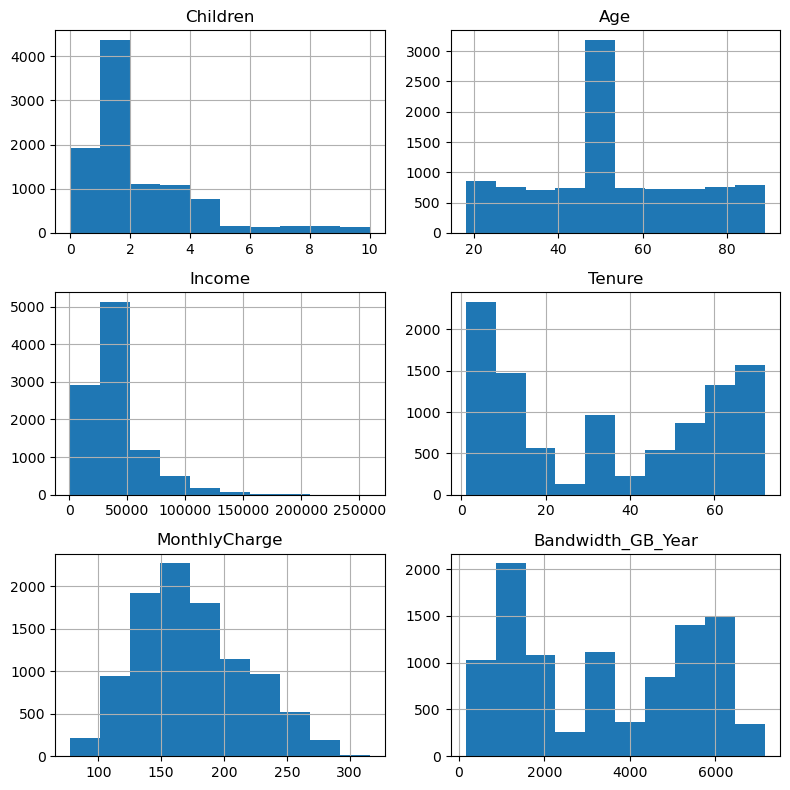

In [38]:
# Create histograms of important variables
df_new_clean[['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge','Bandwidth_GB_Year']].hist(figsize = (8, 8))
plt.savefig('churn_hist.jpg')
plt.tight_layout()
plt.show()

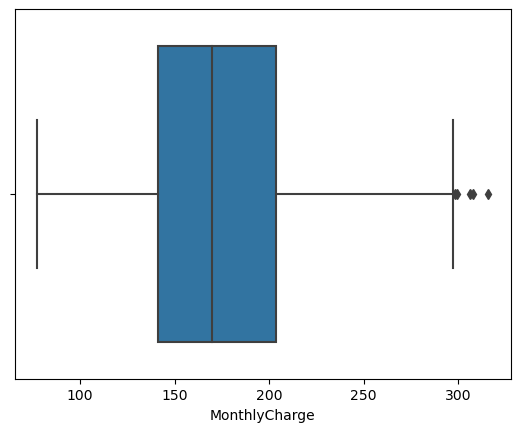

In [39]:
sns.boxplot('MonthlyCharge', data = df_new_clean)
plt.show()

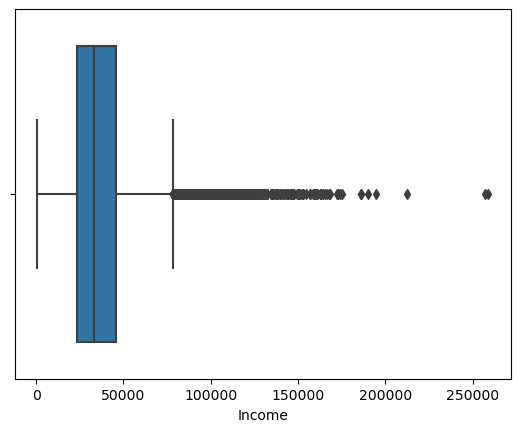

In [40]:

sns.boxplot('Income', data = df_new_clean)
plt.show()

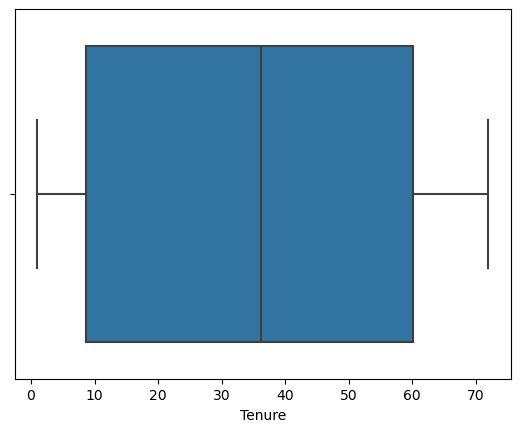

In [41]:
sns.boxplot('Tenure', data = df_new_clean)
plt.show()

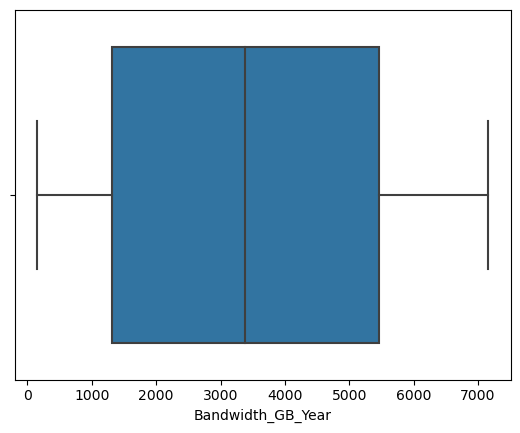

In [42]:
sns.boxplot('Bandwidth_GB_Year', data = df_new_clean)
plt.show()

In [43]:
#Save new clean dataset as new files.
df_new_clean.to_csv('clean_churn.csv')

In [44]:
#load the clean_churn data.
df_clean_churn = pd.read_csv('clean_churn.csv')

In [45]:
# Display first five rows.
df_clean_churn.head()

,Unnamed: 0,Customer_id,City,State,County,Population,Area,Timezone,Job,Children,...,MonthlyCharge,Bandwidth_GB_Year,Timely Responses,Timely Fixes,Timely Replacements,Reliability,Options,Respectfulness Response,Courteous Exchange,Active Listening
0,0,K409198,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,1.0,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1,S120509,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,2,K191035,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,3,D90850,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1.0,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,4,K662701,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0.0,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [46]:
#display the summary of dataframe
df_clean_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   Customer_id              10000 non-null  object 
 2   City                     10000 non-null  object 
 3   State                    10000 non-null  object 
 4   County                   10000 non-null  object 
 5   Population               10000 non-null  int64  
 6   Area                     10000 non-null  object 
 7   Timezone                 10000 non-null  object 
 8   Job                      10000 non-null  object 
 9   Children                 10000 non-null  float64
 10  Age                      10000 non-null  float64
 11  Education                10000 non-null  object 
 12  Employment               10000 non-null  object 
 13  Income                   10000 non-null  float64
 14  Marital                

### Performing PCA

### Step 1: Import

In [47]:
# Import PCA
from sklearn.decomposition import PCA

### Step 2: Define

In [48]:
#Display the last eleven numerical column using slicing method.
churn_pca = df_clean_churn.iloc[:, 36 : 47]
churn_pca.head()

,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely Responses,Timely Fixes,Timely Replacements,Reliability,Options,Respectfulness Response,Courteous Exchange,Active Listening
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


### Step 3: Normalize and apply PCA

In [49]:
# Normalize churn_pca
churn_pca_normalized = (churn_pca - churn_pca.mean())/ churn_pca.std()

In [50]:
# Return how many components you want extracted from the analysis:
pca = PCA(n_components = churn_pca.shape[1])

In [51]:
# call PCA application oand create a new data set that converts the data set of 11 variables into a data set of 11 components:
pca.fit(churn_pca_normalized)

PCA(n_components=11)

In [52]:
churn_pca2 = pd.DataFrame(pca.transform(churn_pca_normalized),
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'])

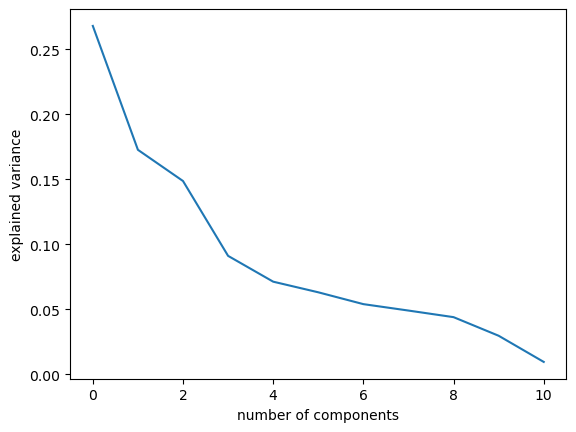

In [53]:
# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

### Step 4: PCA loading

In [55]:
# load components
loadings = pd.DataFrame(pca.components_.T,
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
                       index = churn_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Tenure,-0.010403,0.701838,-0.072209,-0.063594,0.005683,-0.011155,0.007419,-0.011527,0.006935,0.003286,-0.705445
MonthlyCharge,0.000317,0.041147,-0.014151,0.996995,-0.022136,0.015231,-0.018038,-0.004316,0.023690,-0.013785,-0.047865
Bandwidth_GB_Year,-0.012166,0.703079,-0.074222,0.004399,0.009590,0.003466,0.003701,-0.002364,-0.008068,0.008529,0.706925
Timely Responses,0.458932,0.031325,0.281154,0.018568,-0.070233,-0.119149,-0.045963,0.025431,-0.240574,0.793237,-0.004306
Timely Fixes,0.434134,0.042559,0.282404,0.007508,-0.106632,-0.169752,-0.065414,0.074400,-0.592131,-0.573832,-0.002217
Timely Replacements,0.400639,0.034665,0.281118,-0.019631,-0.173742,-0.255336,-0.146887,-0.396333,0.673088,-0.177665,0.014933
Reliability,0.145799,-0.050367,-0.567815,-0.010310,-0.171334,-0.483328,-0.443353,0.431528,0.087207,0.018301,0.002283
Options,-0.175633,0.066334,0.587335,-0.000047,0.135949,0.060124,-0.209767,0.693861,0.265474,-0.042012,-0.002514
Respectfulness Response,0.405207,-0.012680,-0.183447,0.004596,-0.062342,0.064609,0.757954,0.402835,0.230319,-0.063972,0.001604
Courteous Exchange,0.358342,-0.003886,-0.181697,-0.027959,-0.182406,0.806166,-0.379136,0.067889,0.067293,-0.040946,-0.006875


### Step 4: Selecting PCs

In [56]:
# Extract the eigenvalues
cov_matrix = np.dot(churn_pca_normalized.T, churn_pca_normalized) / churn_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

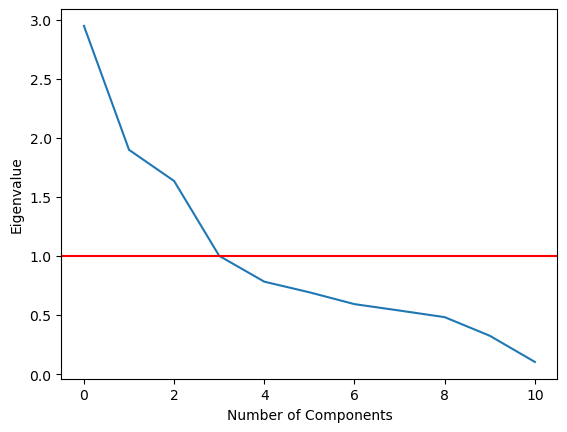

In [57]:
# scree plot with eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y = 1, color = "red")
plt.show();

## Part III: Data Cleaning

### D. Summary of data cleaning process:

### D1. Cleaning Findings:
The churn dataset contains the missing values in Children, Age, Income, Tenure and Bandwidth_GB_Year. Dropping these missing values can reduce the size of the dataset which also leads to false analysis. So I used imputation method for replacing the missing values with median values. The dataset contains outliers in Income, Monthly charge fields.

### D2. Justification of Mitigation Methods:
The imputation method was used for restoring the missing values with median values for better analysis. Boxplot was used to identify the outliers. Boxplot shows Income and MonthlyCharge variables has outliers. The decision was made not to remove the outliers as removing the outliers would remove the maximum data and give inaccurate conclusion.  

### D3. Summary of Outcomes:
The dataset contains the missing values and irrelevant variables which can lead to incorrect analysis. So in order to make better decisions and appropriate analysis, I renamed the eight survey columns for better understanding and imputed the missing values with the median values. Plotted histogram and boxplot to identify the outliers. Cleaned the dataset for analysis
of the variables customer Tenure, MonthlyCharge, Bandwith_GB_Year and responses to survey. 

### D4. Mitigation Code:
See the code above.

### D5. Clean data:
clean_churn.csv file is attached.

### D6. Limitations:
   - There are many NA values in the variables like children, age, income, phone, tenure and bandwidth_GB_year.
   - I was not able to reach out to the person who collected the data.
   - I was not at able to contact or meet in person regarding the empty fields. 

### D7. Impact of Limitations:
   - As the imputation method was used to replace the missing values with the median values to do the further analysis and decision making without making any delay in project, more accurate decision could have been made if the missing information were filled correctly.
   - Better decision could have been made if I was able to contact or reach out to the staff who collected the data regarding the empty fields. For example, Tenure field has NA values, if this was filled correctly then the analysis may be slightly different.
   - The limitations could be corrected by inserting proper value during data acquisition phase by follow-ups.

### E. Application of PCA

### E1. Principle Component:
 To determine the principal components, I used last eleven variables of churn dataset which includes:
 - Tenure                   
 - MonthlyCharge            
 - Bandwidth_GB_Year        
 - Timely Responses           
 - Timely Fixes               
 - Timely Replacements       
 - Reliability                
 - Options                   
 - Respectfulness Response   
 - Courteous Exchange         
 - Active Listening           
 

### E2. Criteria Used:

- I used the package sklearn.decomposition. 
- Defined the last eleven numerical columns for PCA.
- Normalized PCA and displayed the Scree plot.
- Generated output for PCA loadings.
- Identified the most important and meaningful dateset to be
    - Timely Responses
    - Timely Fixes
    - Timely Replacements
    - Respectfulness Response
- Extracted and plot eigenvalues for visualizations.


### E3. Benefits:
- PCA allows an organization to well generalize the models by reducing the dimension of the data and by enhancing the performance of model accuracy.
- After I created the loading matrix, I identified the most important and meaningful variables to be Timely Responses, Timely Fixes, Timely Replacements, Respectfulness Response. The telecommunation company can get benefit from these components as it helps to reduce the churn rate and enhance the retension period of the customers.
- Using the graph scree plot with eigenvalues, I found that the eigenvalues of first three components have the values greater than 1 which indicates that they have strong connections between those variables.

## Part IV: Supporting Documents

### F. Ponapto Video



### G. Sources For Third Party Codes:

Suppress Warnings In Python.(2019). Pythonpool. Retrieve from
https://www.pythonpool.com/suppress-warnings-in-python/ 

How to rename columns in Pandas DataFrame.(Jul., 2022).geeksforgeeks. Retrive from
https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ 

### H. Sources

Nasima Tamboli (Oct., 2021). All you need to know about different types of missing data values and how to handle it. Analytics Vidhya. Retrieve from
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/


Iftach Arbel (n.d.).What Is PCA and How Can I Use It? Retrieve from
https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/

Brems (2017). A One-Stop Shop for Principal Component Analysis. Retrieve from
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
